In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
# load model
model=tf.keras.models.load_model('./models/object_detection.h5')
print("model laoded successfully")

model laoded successfully


In [5]:
path='./plates/images/pic51.jpeg'
image=load_img(path)
image=np.array(image,dtype=np.uint8)  # range 0 to 255
image1=load_img(path,target_size=(224,224))
image_arr_224=img_to_array(image1)/255.0  #converting array into normalized output



In [6]:
h,w,d=image.shape
print('height is ',h)
print('height is ',w)


height is  194
height is  259


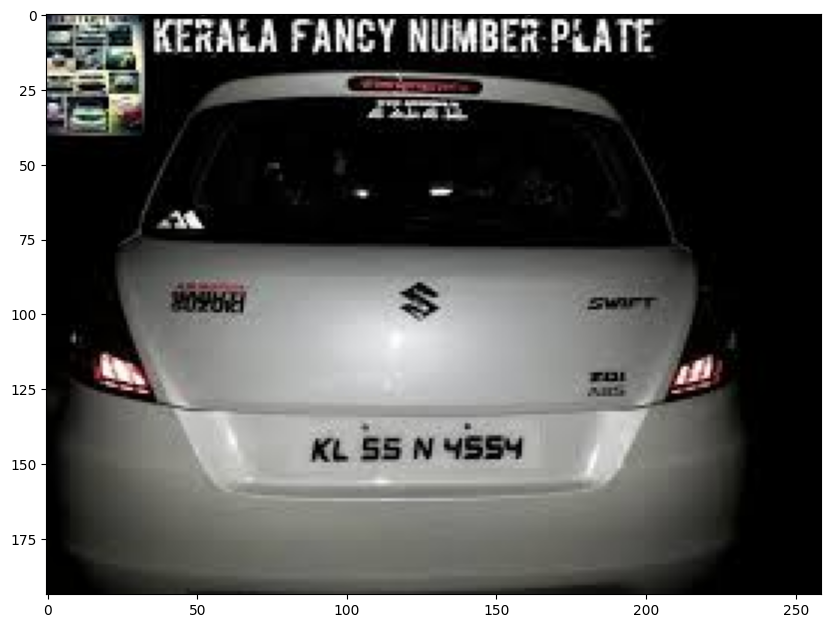

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


In [8]:
image_arr_224.shape

(224, 224, 3)

In [9]:
test_arr=image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [10]:
#make prediction

coords=model.predict(test_arr)
coords

1/1 [==============================] - 2s 2s/step


array([[0.30426216, 0.63540137, 0.73348075, 0.78873533]], dtype=float32)

In [11]:
#denormalize
denorm=np.array([w,w,h,h])
coords=coords*denorm
coords

array([[ 78.80389977, 164.56895435, 142.29526579, 153.01465404]])

In [12]:
coords=coords.astype(np.int32)
coords

array([[ 78, 164, 142, 153]])

(78, 164) (142, 153)


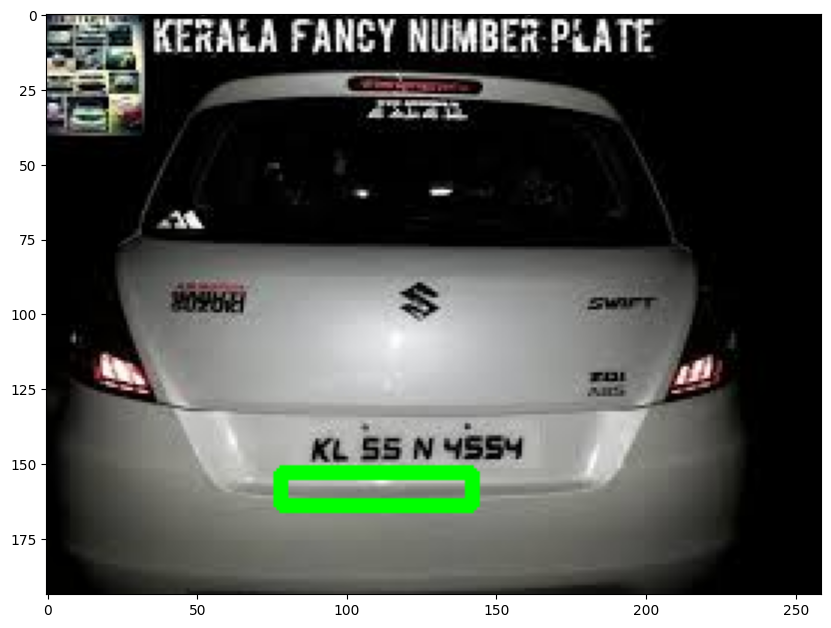

In [13]:
#Drawing the bounding box of image
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,xmax)
pt2=(ymin,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
pt1,pt2
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


In [14]:

path='./plates/images/1.jpeg'
def object_detection(path):
    # Read the image
    image = load_img(path)
    image = np.array(image, dtype=np.uint8)  # Range 0 to 255
    image1 = load_img(path, target_size=(224, 224))

    image_arr_224 = img_to_array(image1) / 255.0  # Converting array into normalized output
    h, w, d = image.shape

    test_arr = image_arr_224.reshape(1, 224, 224, 3)

    # Make prediction
    coords = model.predict(test_arr)

    # Denormalize
    denorm = np.array([w, w, h, h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    # Drawing the bounding box on the image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, xmax)
    pt2 = (ymin, ymax)
    print(pt1, pt2)
    cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)

    return image, coords



1/1 [==============================] - 0s 145ms/step
(109, 194) (130, 140)


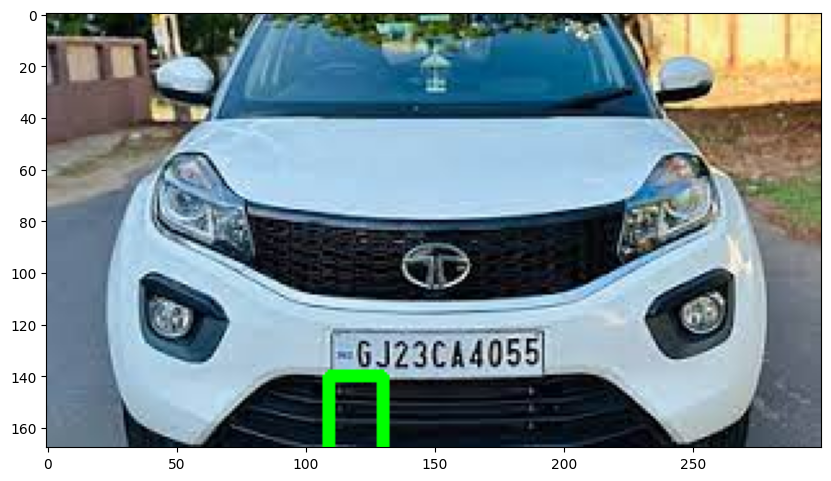

In [15]:
path='./plates/images/1.jpeg'
image,cods=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


Optical Character Recognition-OCR




In [17]:
import pytesseract as pt

1/1 [==============================] - 0s 138ms/step
(109, 194) (130, 140)


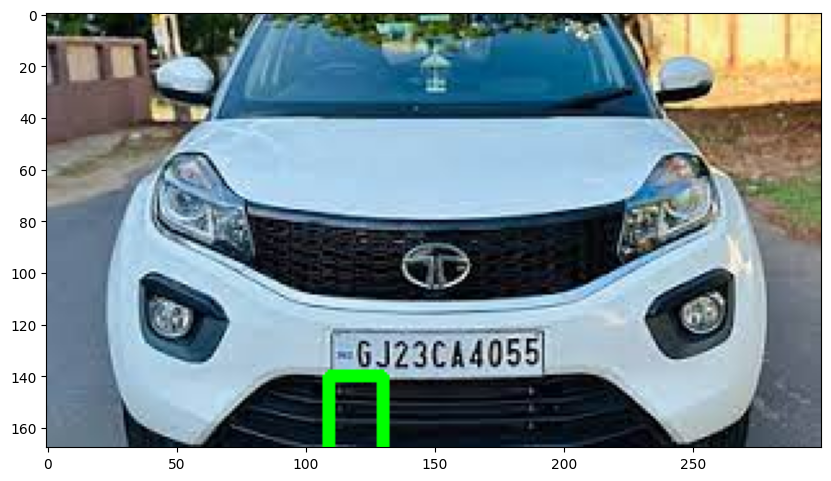

In [28]:
path='./plates/images/1.jpeg'
image,cods=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [29]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax=cods[0]
roi=img[ymin:ymax,xmin:xmax]

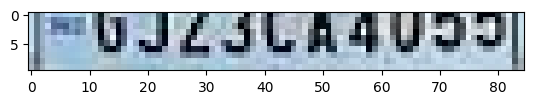

In [30]:
plt.imshow(roi)
plt.show()

In [32]:
# Extracting text from image 
text=pt.image_to_string(roi)
print(text)

 

umaw


